<a href="https://colab.research.google.com/github/eliekawasfr/Prediction-of-Product-Sales/blob/main/Elie's_Prediction_of_Product_Sales_1_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> # **Project Title: (Prediction of Product Sales).**
- **Author**: *Elie Kawas*



> ## Project Overview


> ## Load and Inspect Data

In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)

fname ="/content/drive/MyDrive/Colab Notebooks/github project/sales_predictions_2023.csv"
df = pd.read_csv(fname)
df.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [142]:
df.shape

(8523, 12)

> ## Clean Data


In [143]:
col_types=df.dtypes
col_types
#all types are correct

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [144]:
duplicated_rows = df.duplicated(keep=False)
duplicated_rows.sum()

0

In [145]:
df.nunique() / len(df) * 100


Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [146]:
duplicated_id = df.duplicated(subset=['Item_Identifier'], keep=False)
duplicated_id.sum()
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [147]:
null_values=df.isna()
null_values.value_counts()
null_sums = df.isna().sum()
null_sums
null_percent = null_sums/len(df) * 100
null_percent
#weight and size

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [148]:
cat_cols = df.select_dtypes('object').columns
cat_cols
num_cols = df.select_dtypes('number').columns
num_cols
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [149]:
df[num_cols].describe()

df['Item_Weight'].describe()
df['Item_Weight'].info()
df['Item_Weight']

df['Outlet_Establishment_Year'].describe()
#df['Outlet_Establishment_Year'].info()
#df['Outlet_Establishment_Year']

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Weight
Non-Null Count  Dtype  
--------------  -----  
7060 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [150]:
df['Item_Weight']=df['Item_Weight'].fillna(-1)
df['Outlet_Size']=df['Outlet_Size'].fillna('MISSING')
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [151]:
cat_cols = df.select_dtypes('object').columns
cat_cols
num_cols = df.select_dtypes('number').columns
num_cols

df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [152]:
df = df.set_index('Item_Identifier')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [153]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


> ## Exploratory Data Analysis



### which outlet type made the highest income

In [154]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values()

Outlet_Type
Grocery Store         339.828500
Supermarket Type2    1995.498739
Supermarket Type1    2316.181148
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

### Which outlet type made the most sales

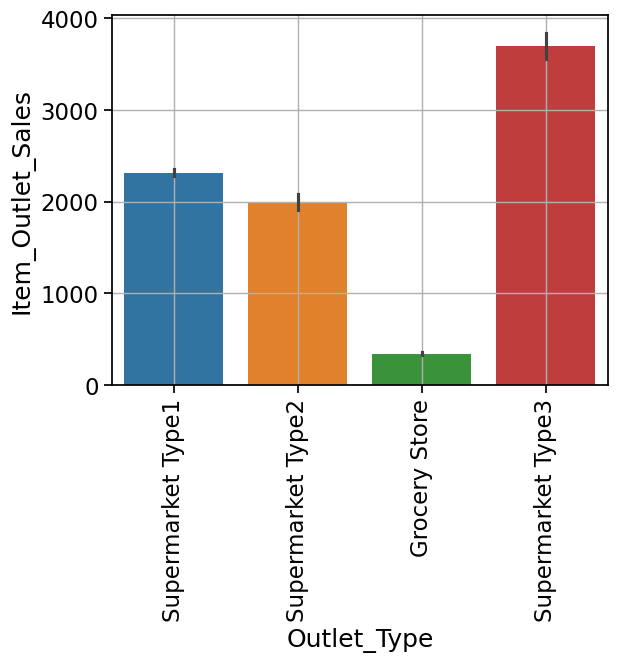

In [155]:
ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', hue = 'Outlet_Type')
plt.xticks(rotation=90)
ax.grid()

- type 3 has created the most sales in value

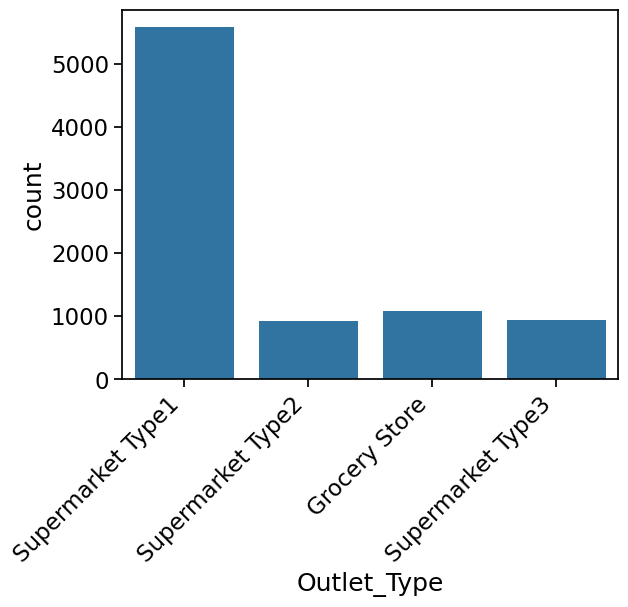

In [156]:
ax = sns.countplot(data=df, x="Outlet_Type")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');



- type 1 has created the higher number of transactions

### Item type sale Count & Item Sales income plots

In [157]:
ivalues = df['Item_Type'].value_counts()
ivalues


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

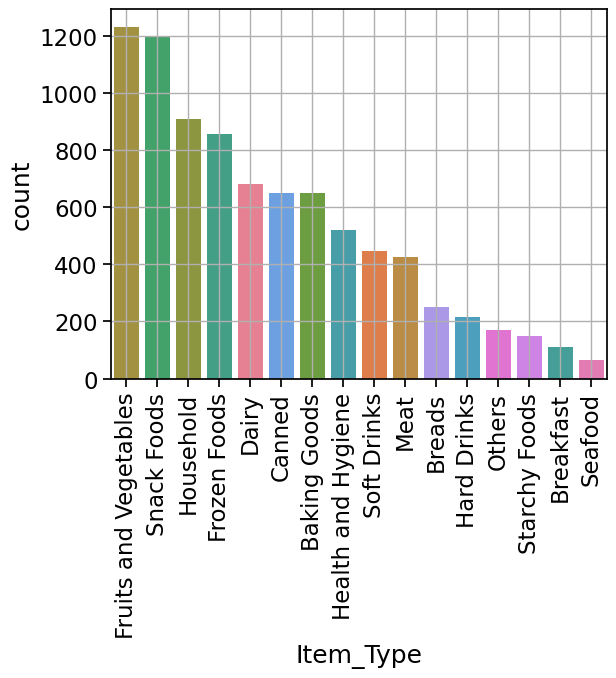

In [158]:
ax = sns.countplot(data=df, x='Item_Type', hue = 'Item_Type', order = ivalues.index )
plt.xticks(rotation=90)
ax.grid()

-  most of outlets sales were Fruits & Vegetables and Snack Foods


In [159]:
Gtypesales = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()
Gtypesales

Item_Type
Others                   1926.139702
Baking Goods             1952.971207
Soft Drinks              2006.511735
Health and Hygiene       2010.000265
Breakfast                2111.808651
Frozen Foods             2132.867744
Hard Drinks              2139.221622
Meat                     2158.977911
Breads                   2204.132226
Canned                   2225.194904
Dairy                    2232.542597
Household                2258.784300
Snack Foods              2277.321739
Fruits and Vegetables    2289.009592
Seafood                  2326.065928
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

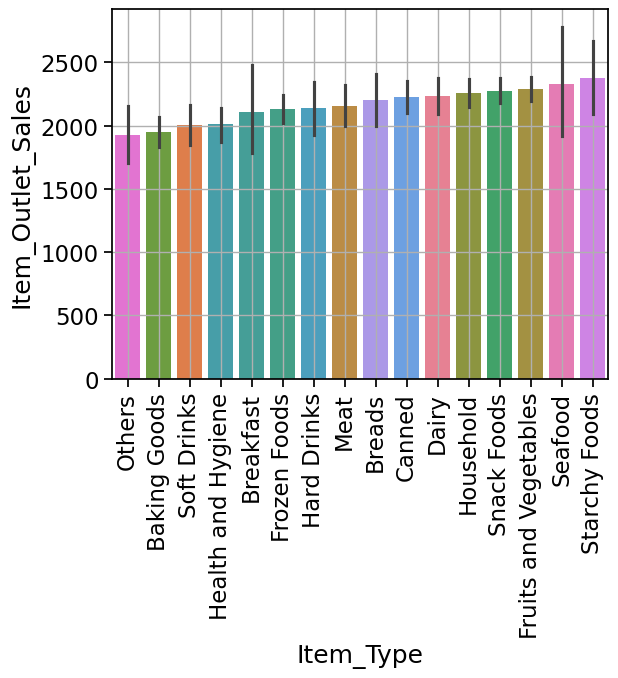

In [160]:
ax = sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales', hue = 'Item_Type', order = Gtypesales.index)
plt.xticks(rotation=90)
ax.grid()


-  higher value of transaction were starchy foods and seafood (made a higher income through less transactions in this situation than vegetables and fruits)

###  several histograms each represnting the number of occurance in a transaction, and focusing on which is the most outlet type we have sold through, and what are the most done item transaction based on its sale price


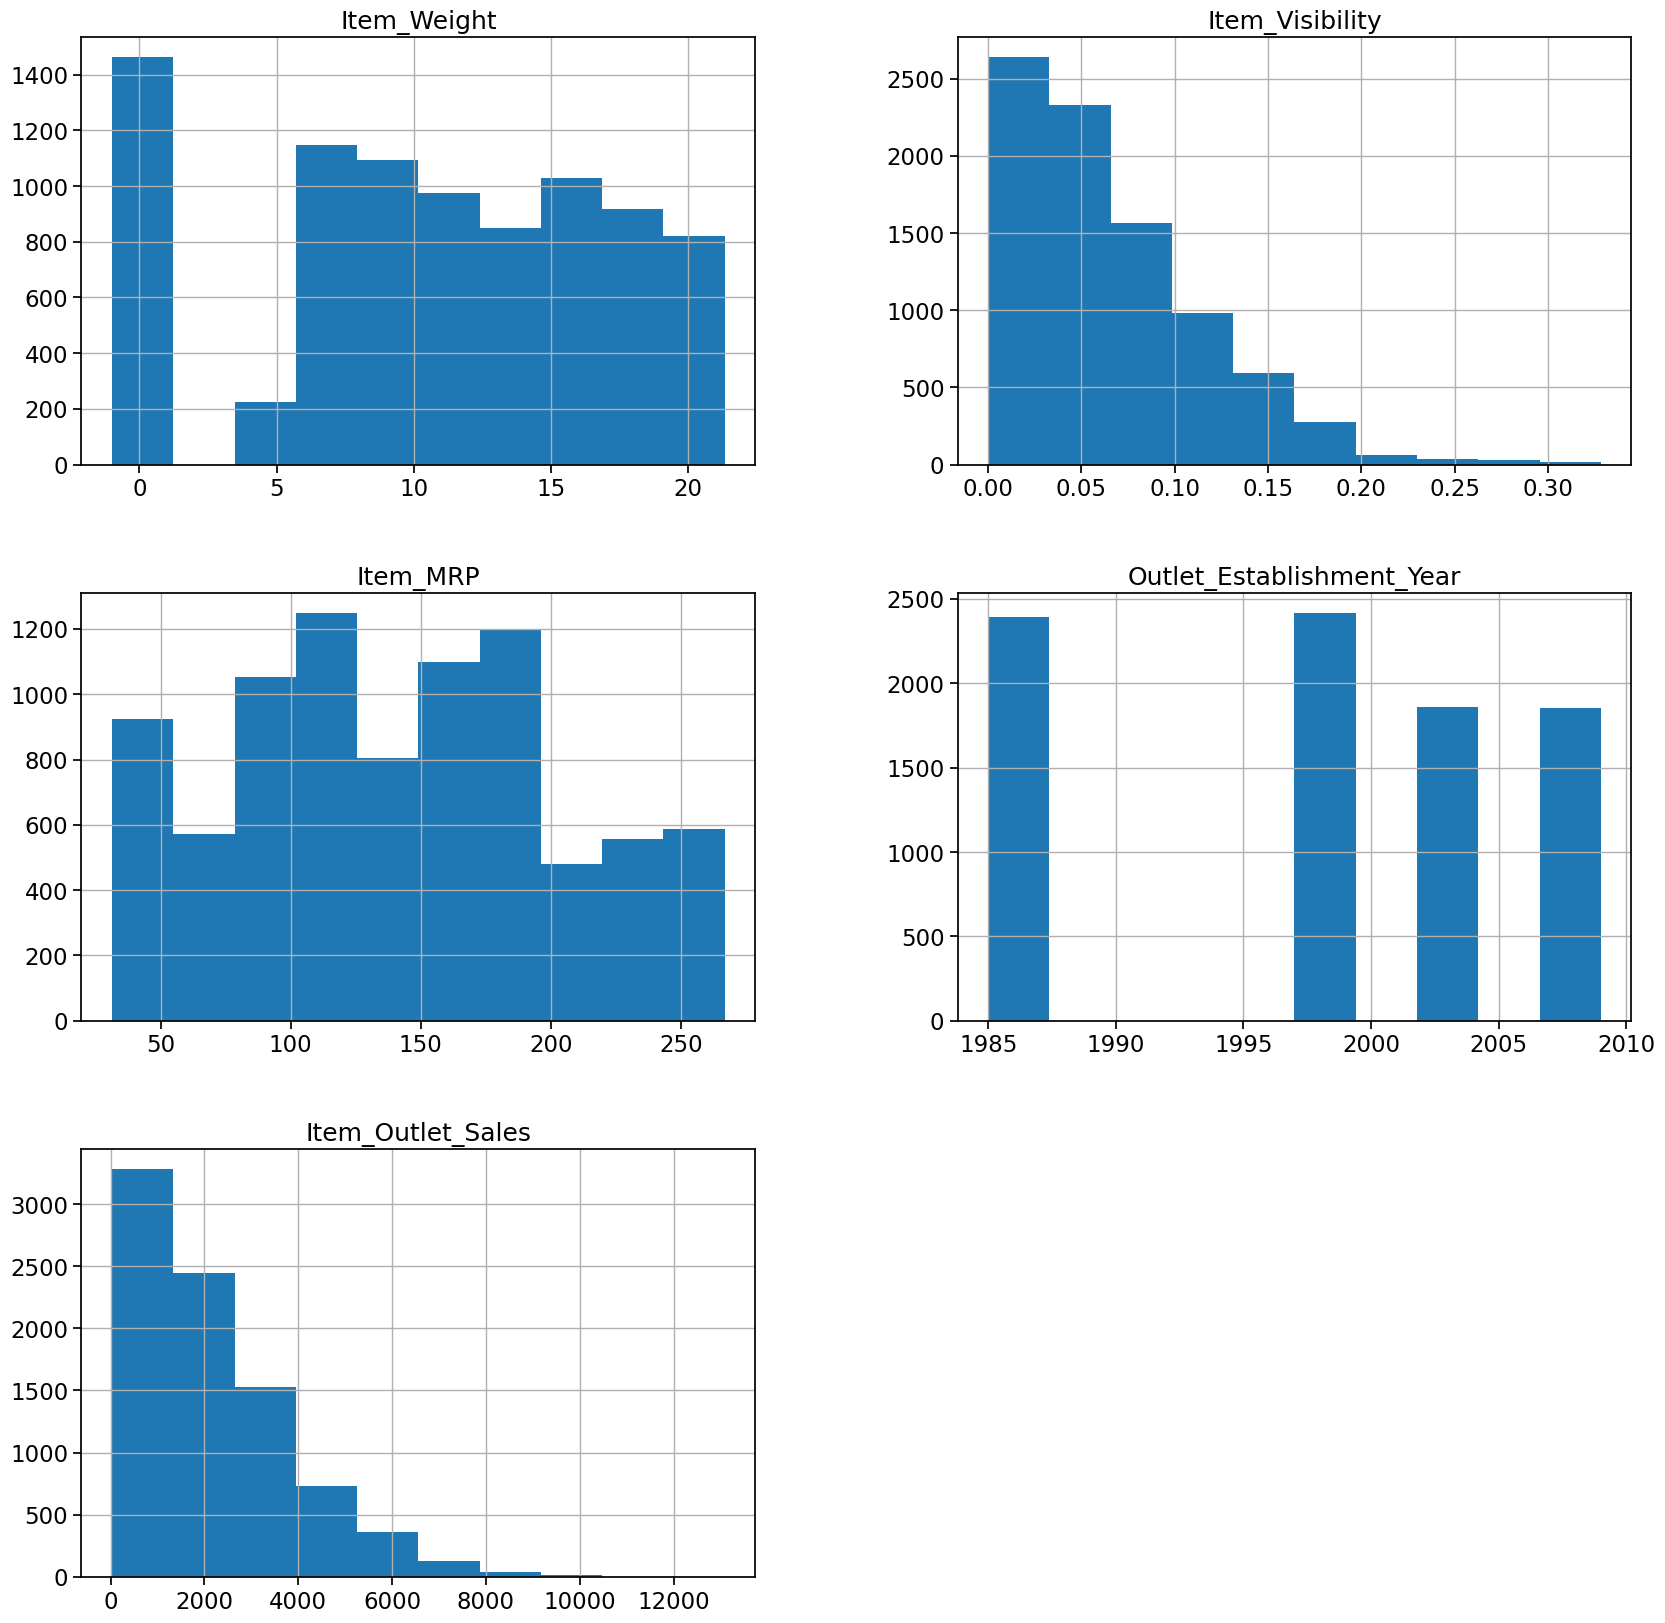

In [161]:
df.hist(figsize=(20,20));

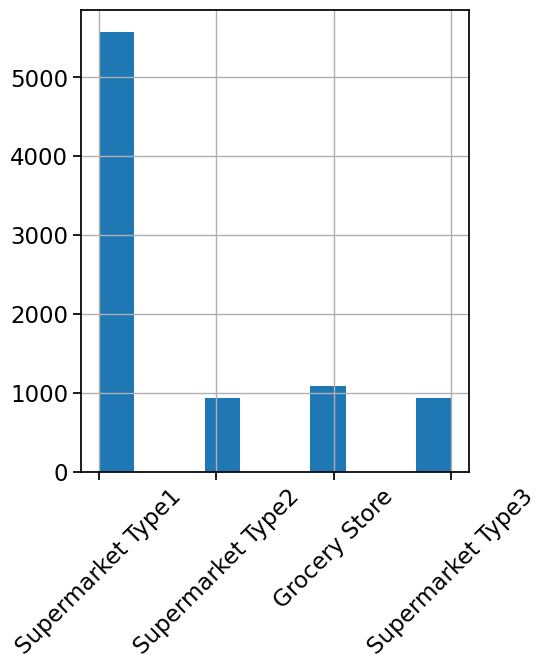

In [162]:
df['Outlet_Type'].hist(figsize=(5,6))
plt.xticks(rotation=45);

- supermarket type 1 occured the most in rows

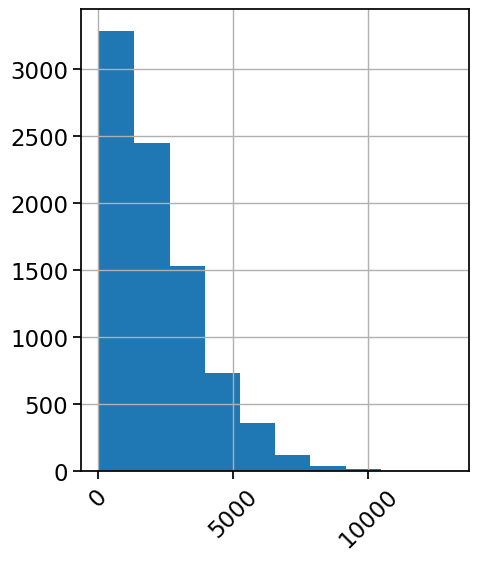

In [163]:
df['Item_Outlet_Sales'].hist(figsize=(5,6))
plt.xticks(rotation=45);

- we have sole less of the higher value transactions

### Boxplots exploring outliers, medians & Interquartile range, focusing on item sales


<Axes: >

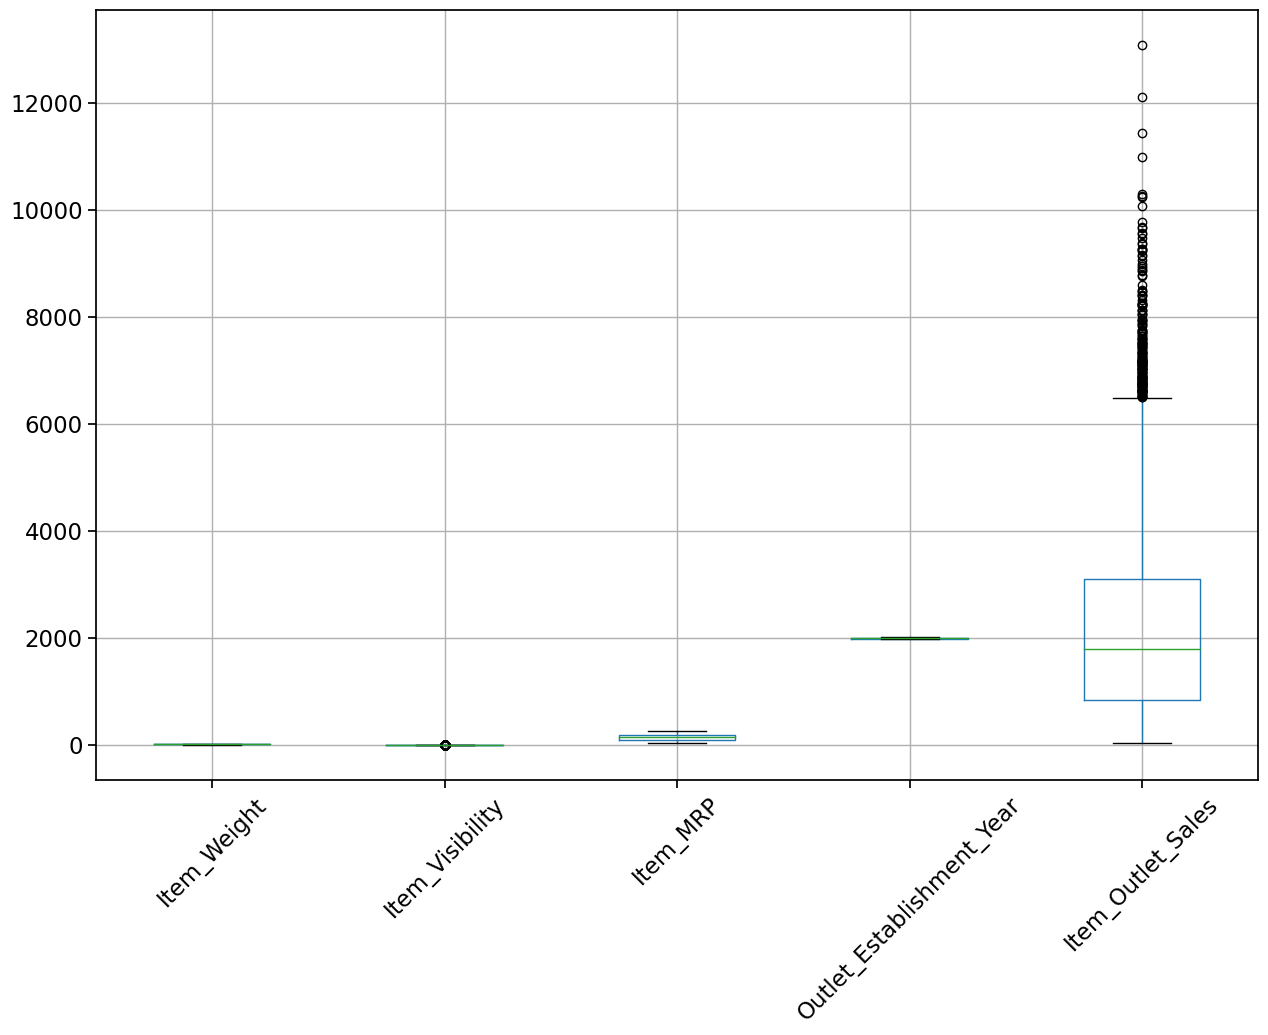

In [164]:
ax = df.boxplot(figsize=(15,10), rot=45 )
ax


count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


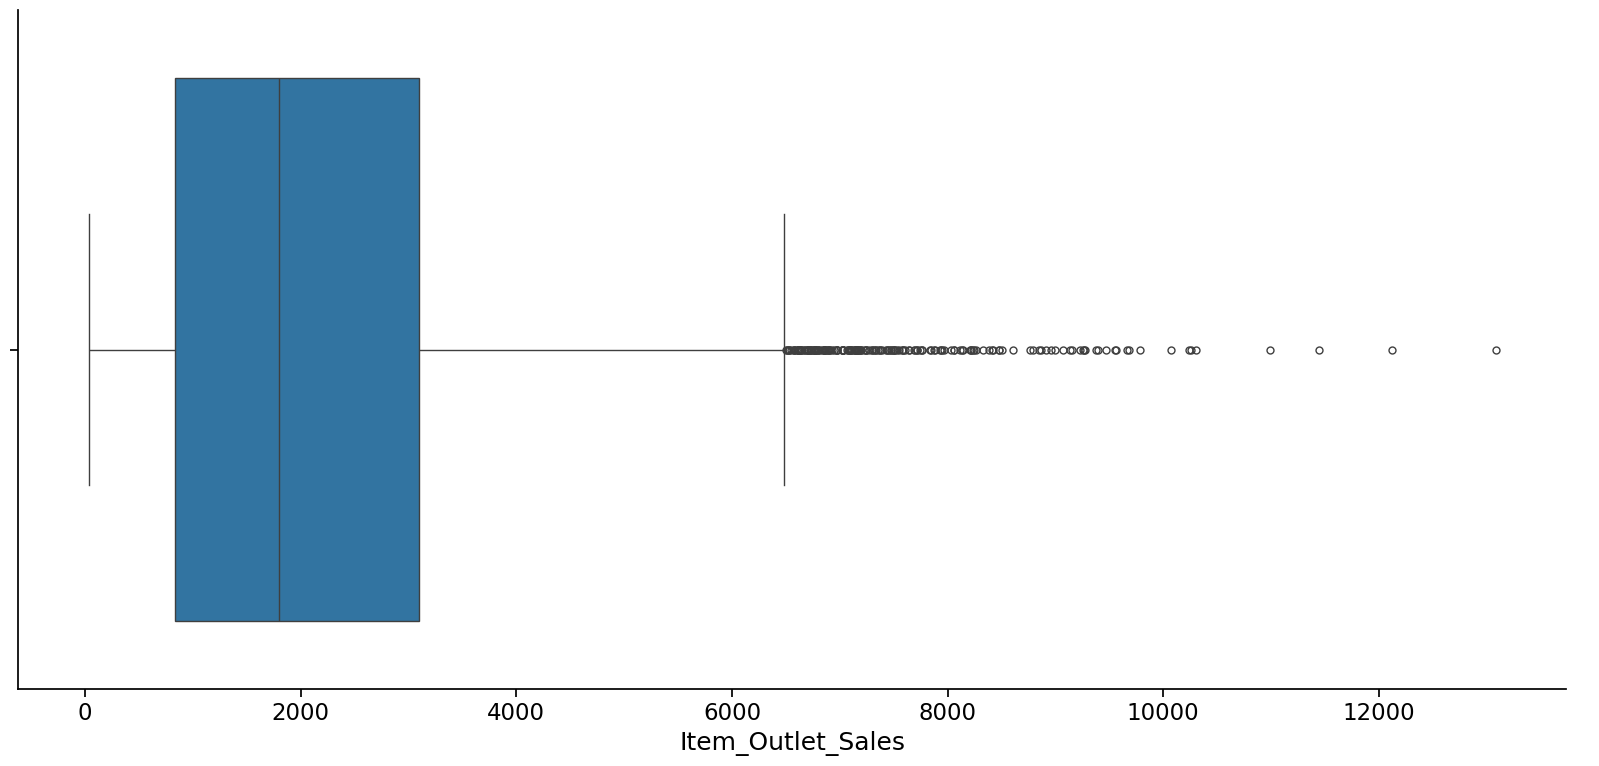

In [165]:
g = sns.catplot(data=df , x = 'Item_Outlet_Sales' , kind='box', dodge=False, height=8, aspect=2)
print(df['Item_Outlet_Sales'].describe())


- we can see in this boxplot that most items sold are closer to 2000, but some outliers exist in the range of more than 6501.8699

### Exploring some countplots

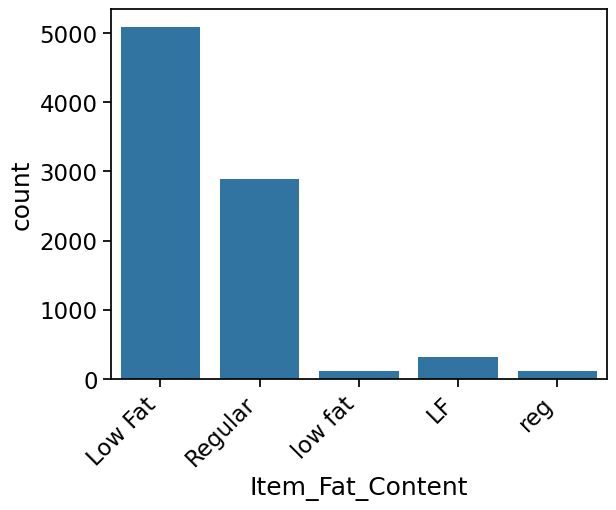

In [166]:
ax = sns.countplot(data=df, x="Item_Fat_Content")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- here we explore that more sales have been processed for the low fat category

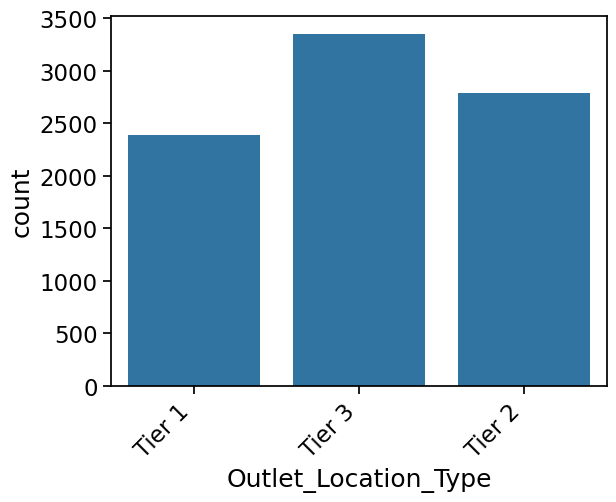

In [167]:
ax = sns.countplot(data=df, x="Outlet_Location_Type")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');



### Correlation of the numerical variables in the DF to explore the relationship between variables


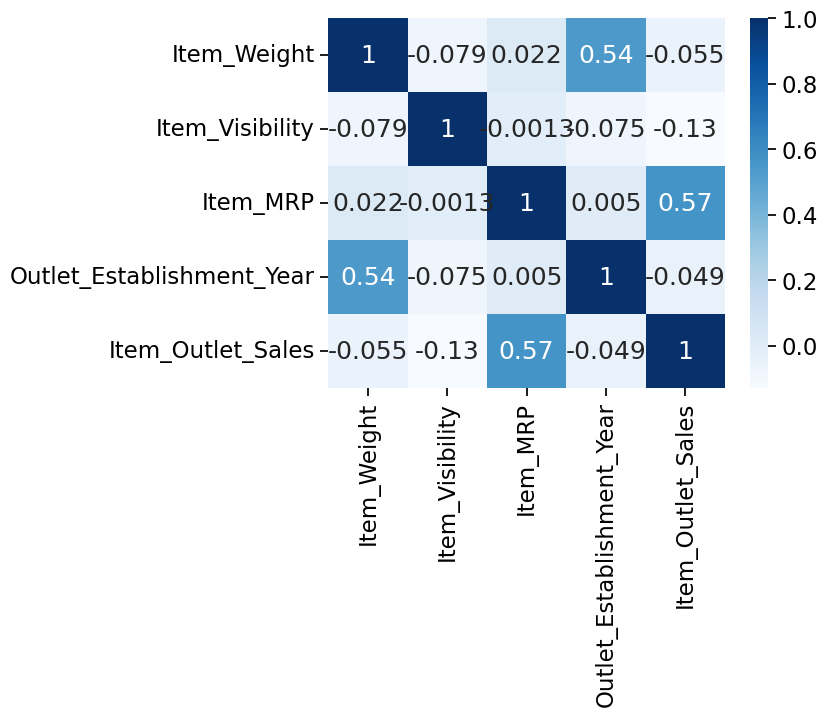

In [168]:
corr = df.corr(numeric_only = True)
corr.round(2)
sns.heatmap(corr, cmap = 'Blues', annot = True);

- we can detect that there was no high correlation between any variable, but it is moderate when we for example put Maximum Retail Price against the item outlet sales, we find a moderate correlation which indictaes when there is a higher item sale (higher value item) the probability of having a higher MRP is increased

> ## Feature Inspection

### - following the instructions to replace with null values and previous errors

In [169]:
df['Item_Weight']=df['Item_Weight'].replace(-1 , np.nan )
df['Outlet_Size']=df['Outlet_Size'].replace('MISSING', np.nan)
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [170]:
import warnings
warnings.filterwarnings("ignore")

In [171]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF', 'low fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg', 'Regular')

### rechecking data

In [172]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### univariate

#### univariate function for categorical

In [173]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



#### categorical univariate function applications

##### Whether the product is low-fat or regular


###### Whether the product is low-fat or regular

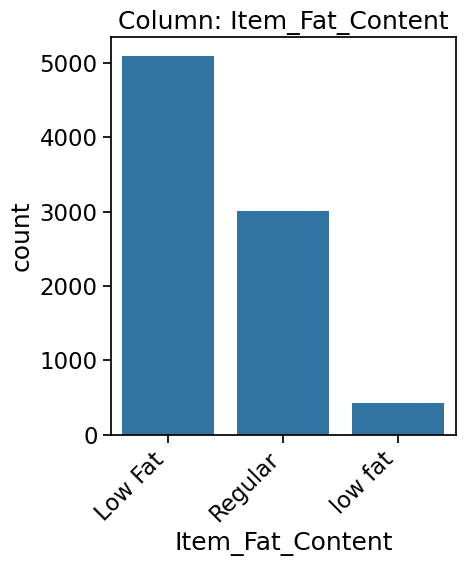

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Low Fat' occurs 5089 times (59.71%)
- Not constant or quasi-constant.


In [174]:
fig, ax = explore_categorical(df, 'Item_Fat_Content', figsize = (5,6))

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - no nulls found

- Is the feature constant or quasi-constant?
 - the feature is neither quasi-\constant

- What is the cardinality? Is it high?
 - it is not a high cardinality feature

- Would we know this BEFORE the target is determined?
 - yes

- Is there a business case/understanding reason to exclude based on our business case?
 - we wouldnt want to exclude this feature from our data

##### The category to which the product belongs


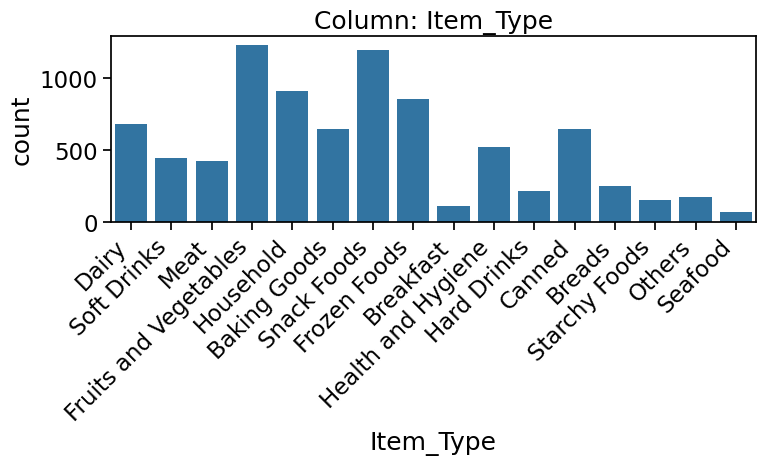

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [175]:
fig, ax = explore_categorical(df, 'Item_Type', figsize = (8,5))

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - no nulls found

- Is the feature constant or quasi-constant?
 - the feature is neither quasi-\constant

- What is the cardinality? Is it high?
 - it is a high cardinality feature

- Would we know this BEFORE the target is determined?
 - yes

- Is there a business case/understanding reason to exclude based on our business case?
 - we wouldnt want to exclude this feature from our data

#####  Store ID

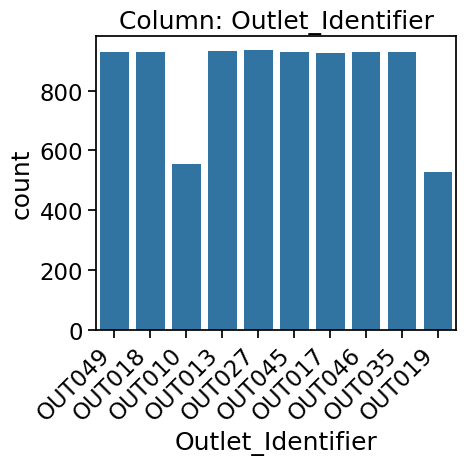

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [176]:
fig, ax = explore_categorical(df, 'Outlet_Identifier', figsize = (5,5))

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - no nulls found

- Is the feature constant or quasi-constant?
 - the feature is neither quasi-\constant

- What is the cardinality? Is it high?
 - it is a high cardinality feature

- Would we know this BEFORE the target is determined?
 - yes

- Is there a business case/understanding reason to exclude based on our business case?
 - I would like to focus on more affecting features connected to the ID such as store type or size, so i would exclude this feature

#####  The size of the store in terms of ground area covered


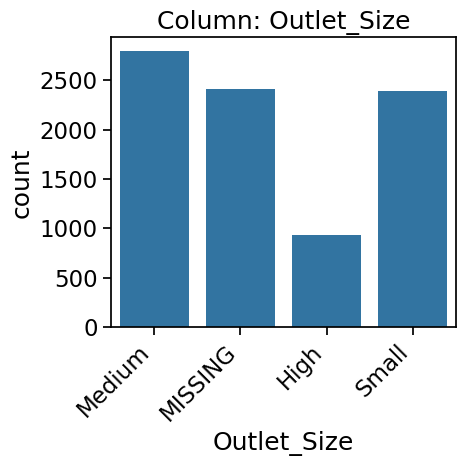

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [177]:
fig, ax = explore_categorical(df, 'Outlet_Size', figsize = (5,5))

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - NaN's Found: 2410 (28.28%), depends on if im interested in these ceratin stores, but usually id look at the data and see a large sum of the sample variancing between the three sizes that would give me a good enough indication of the target im after, in some cases i might want to investigate more and re-check the missing values for the size, in my opinion its immaterial to check for it, id rather move on with the data inhand.

- Is the feature constant or quasi-constant?
 - the feature is neither quasi-\constant

- What is the cardinality? Is it high?
 - it is not a high cardinality feature

- Would we know this BEFORE the target is determined?
 - yes

- Is there a business case/understanding reason to exclude based on our business case?
 - we wouldnt want to exclude this feature from our data

##### The type of area in which the store is located


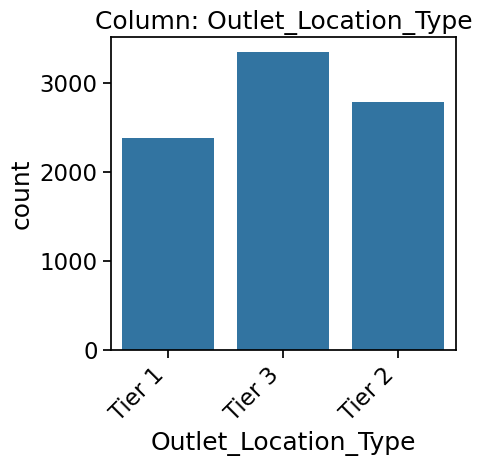

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [178]:
fig, ax = explore_categorical(df, 'Outlet_Location_Type', figsize = (5,5))

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - no nulls found

- Is the feature constant or quasi-constant?
 - the feature is neither quasi-\constant

- What is the cardinality? Is it high?
 - it is not a high cardinality feature

- Would we know this BEFORE the target is determined?
 - yes

- Is there a business case/understanding reason to exclude based on our business case?
 - we wouldnt want to exclude this feature from our data

##### Whether the outlet is a grocery store or some sort of supermarket

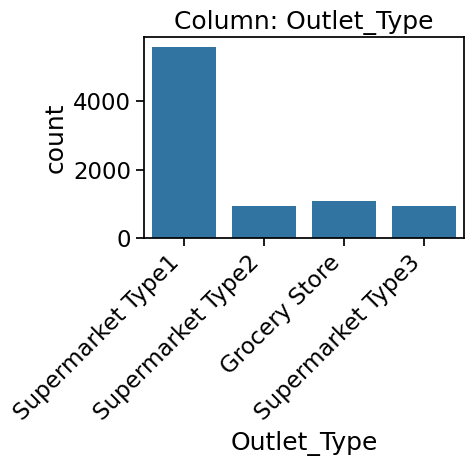

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [179]:
fig, ax = explore_categorical(df, 'Outlet_Type', figsize = (5,5))

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - no nulls found

- Is the feature constant or quasi-constant?
 - the feature is neither quasi-\constant

- What is the cardinality? Is it high?
 - it is a high cardinality feature

- Would we know this BEFORE the target is determined?
 - yes

- Is there a business case/understanding reason to exclude based on our business case?
 - we wouldnt want to exclude this feature from our data

##### The year in which store was established


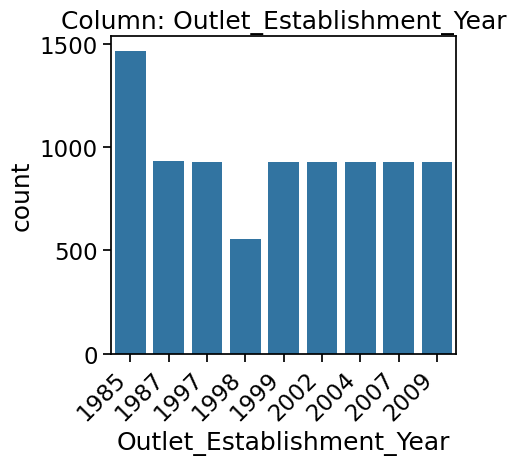

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [180]:
fig, ax = explore_categorical(df, 'Outlet_Establishment_Year', figsize = (5,5))

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
 - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - no nulls found

- Is the feature constant or quasi-constant?
 - the feature is neither quasi-\constant

- What is the cardinality? Is it high?
 - it is not a high cardinality feature

- Would we know this BEFORE the target is determined?
 - yes

- Is there a business case/understanding reason to exclude based on our business case?
 - we wouldnt want to exclude this feature from our data

#### numerical univariate function

In [181]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")



#### numerical univariate funtion applications

##### Weight of product


In [182]:
#explore_numeric(df, "Item_Weight" )

explain why explore_numeric(df, "Item_Weight") has an error

The error is because there are missing values in the `Item_Weight` column. The `sns.histplot()` and `sns.boxplot()` functions cannot handle missing values by default. To fix this, you can either drop the rows with missing values or impute the missing values.

To drop the rows with missing values, you can use the following code:



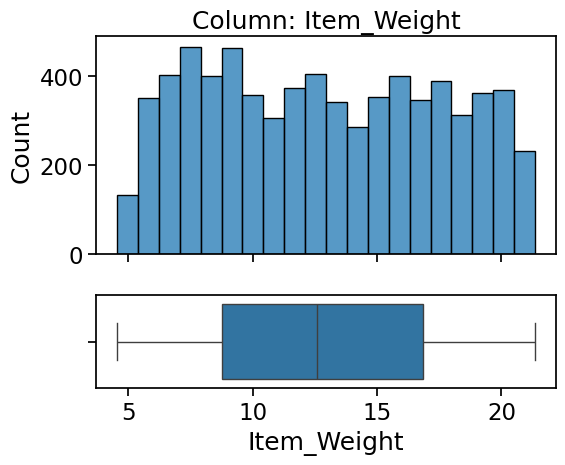

- NaN's Found: 0 (0.0%)


In [183]:
# prompt: in explore_numeric(df, "Item_Weight" ) drop nulls

explore_numeric(df[df['Item_Weight'].notna()], "Item_Weight" )


In [184]:
x = 'Item_Weight'
null_count = df[x].isna().sum()
null_perc = round(null_count/len(df)* 100, 2)
print(f"- NaN's Found in {x}: {null_count}")

print(f'representing {null_perc} %')

- NaN's Found in Item_Weight: 1463
representing 17.17 %


- it is a numeric feature that we wouldnt exclude of our  feature set, it is not a constant or quasi-constant, this feature has 1463 nulls representing 17.17% of the data

##### The percentage of total display area of all products in a store allocated to the particular product


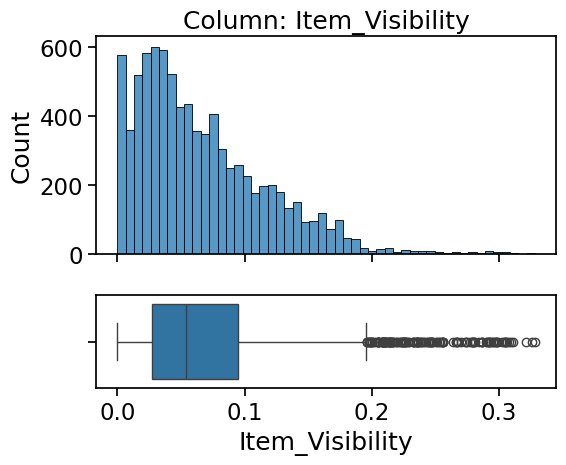

- NaN's Found: 0 (0.0%)


In [185]:
explore_numeric(df, "Item_Visibility")

- it is a numeric feature that we wouldnt exclude of our  feature set, it is not a constant or quasi-constant, this feature has 0 nulls

##### Maximum Retail Price (list price) of the product


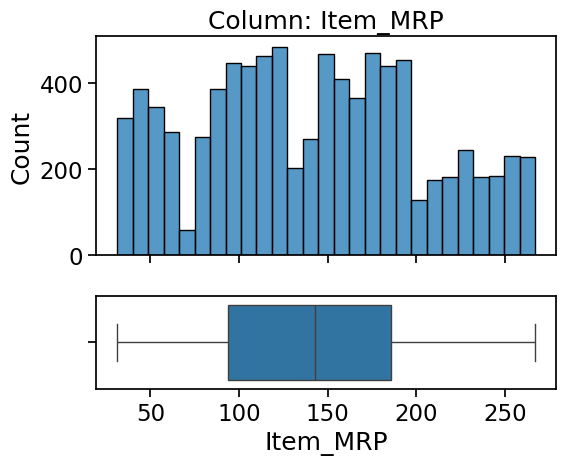

- NaN's Found: 0 (0.0%)


In [186]:
explore_numeric(df, "Item_MRP")

- it is a numeric feature that we wouldnt exclude of our  feature set, it is not a constant or quasi-constant, this feature has 0 nulls

##### Sales of the product in the particular store. This is the target variable to be predicted.

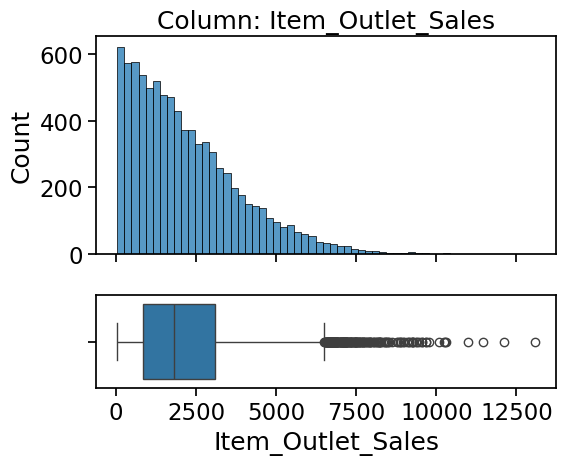

- NaN's Found: 0 (0.0%)


In [187]:
explore_numeric(df, "Item_Outlet_Sales")

- it is a numeric feature that we wouldnt exclude of our  feature set, it is not a constant or quasi-constant, this feature has 0 nulls

### multivariate expamples

##### numeric vs target

###### numeric vs target function

In [188]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8} #### KWS
  line_kws = dict(color='black')  ###  i added this
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, line_kws=line_kws , **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

###### numeric vs target application

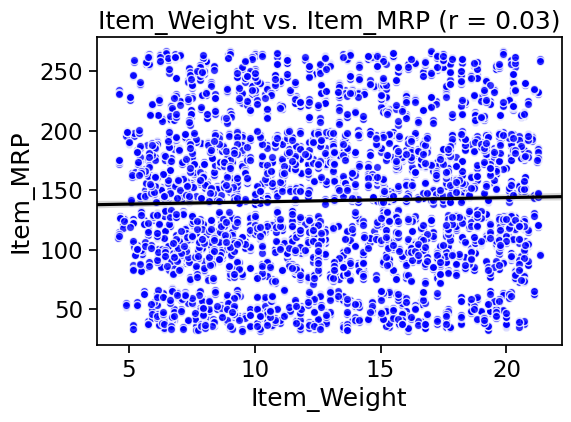

In [189]:
fig, ax = plot_numeric_vs_target(df, "Item_Weight", y= 'Item_MRP' ,color = 'blue', truncate = False)

- we can see there is almost no correlation between the two

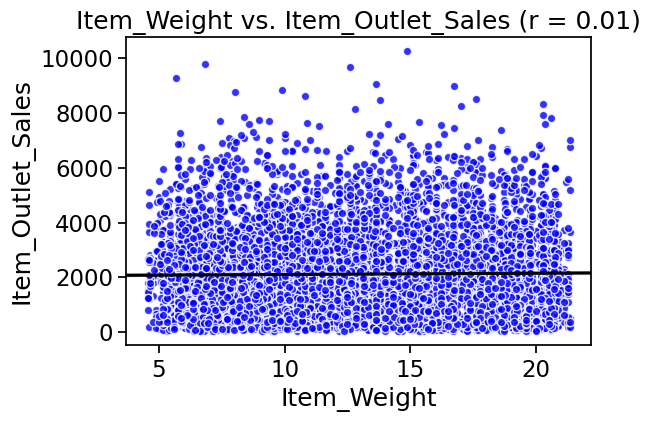

In [190]:
fig, ax = plot_numeric_vs_target(df, "Item_Weight" ,color = 'blue', truncate = False)

##### categorical vs target

###### categorical vs target function

In [191]:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

###### categorical vs target application

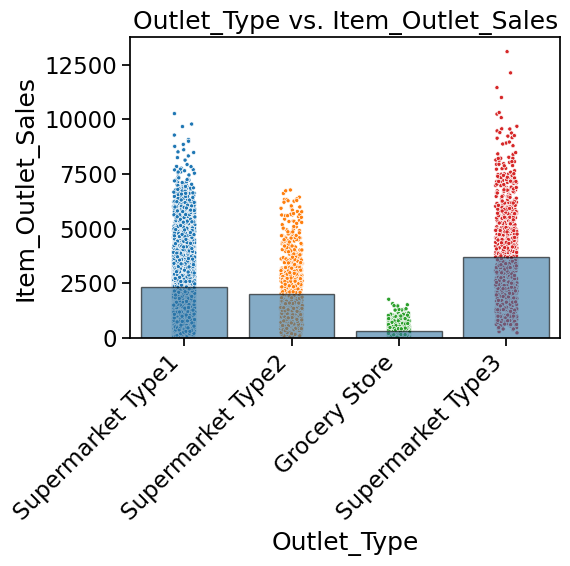

In [192]:
fig, ax = plot_categorical_vs_target(df, x='Outlet_Type', figsize=(6,6))

- the most item outlet sales came from supermarket type 3, which is has laso the maximum sales of the outlets, this will drive us to set a contsant expectation for the supermarket type if there was no other driving factor for these sales

### prediction of the target probability

- we have inspected many features against multiple targets, for example item wight is not a driver or can make a precise predition for item max retail price neither the sales
- on the other hand the outlet type might be a good start to predict outlet sales

##  Machine learning preparation 1 - 5

- i did not use a fresh dataset because in the previous chapter i counter coded codes that had to do with filna and replace, and for now i will only fix the column 'Item_Fat_Content' since it still has inconsistencies

### re checking the data

In [193]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [194]:
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.0+ MB


In [196]:
df.duplicated().sum()

0

In [197]:
df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)

### additional imports

In [198]:
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

### train test split

In [199]:
# Define features and target
X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### creating tuples according to values type

#### numeric columns

In [200]:
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

num_pipe = make_pipeline(impute_median, scaler)
num_pipe


num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

#### ordinal columns

In [201]:
#cat:  Item_Type   Outlet_Identifier

In [202]:
X_train['Outlet_Type'].value_counts()

Supermarket Type1    4166
Grocery Store         799
Supermarket Type3     723
Supermarket Type2     704
Name: Outlet_Type, dtype: int64

In [203]:
X_train['Outlet_Location_Type'].value_counts()

Tier 3    2531
Tier 2    2106
Tier 1    1755
Name: Outlet_Location_Type, dtype: int64

In [204]:
ord_cols = ['Item_Fat_Content', 'Outlet_Size']
print("Ordinal Columns:", ord_cols)


impute_na_ord = SimpleImputer(strategy='most_frequent', fill_value='NA')


itemfatorder = ['Low Fat', 'Regular']

outletsizeorder = ['Small' , 'Medium', 'High']


ordinal_category_orders = [itemfatorder, outletsizeorder]


ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)


scaler_ord = StandardScaler()

ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe


ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

Ordinal Columns: ['Item_Fat_Content', 'Outlet_Size']


('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                             ['Small', 'Medium', 'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Item_Fat_Content', 'Outlet_Size'])

#### categorical\nominal columns

In [205]:
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)

impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

ohe_pipe = make_pipeline(impute_na, ohe_encoder)



ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

ohe_pipe

OneHotEncoder Columns: Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### creating the transformer, Fit to training data, transforming train + test

In [206]:
# # Instantiate transformer
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

# Fit on training data
col_transformer.fit(X_train)

# transforming
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='most_frequent')),
                                                 ('ord...
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

### checking data head

In [207]:
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NCG06,0.827485,-0.712775,1.828109,1.327849,-0.740321,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
FDV57,0.566644,-1.291052,0.603369,1.327849,1.350766,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
FDM27,-0.121028,1.813319,0.244541,0.136187,1.350766,0.287374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
FDG24,-1.158464,-1.004931,-0.952591,0.732018,-0.740321,-1.384048,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
FDD05,1.538870,-0.965484,-0.336460,0.493686,-0.740321,0.287374,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
